In [1]:
#import libraries and importin Svm
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
dir = 'C:\projects\Cats and Dogs\dataset'

In [3]:
#load the Datasets 
categories = ['Cat', 'Dog']

data = []

for category in categories:
    path = os.path.join(dir,category)
    label = categories.index(category)

#reshaping the svm    
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        img = cv2.imread(imgpath,0)
        try:
            img = cv2.resize(img,(50,50))
            image = np.array(img).flatten()

            data.append([image,label])
        except Exception as e:
            pass
#print the total count of the image         
print(len(data)) 

24946


In [4]:
pick_in = open('data1.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

In [5]:
pick_in = open('data1.pickle','rb')
data = pickle.load(pick_in)
pick_in.close()

In [10]:
#suffle the data
random.shuffle(data)
features = []
labels =[]

for feature , label in data:
    features.append(feature)
    labels.append(label)
    
#train the model
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size = 0.88)

#import the model
model = SVC (C=1, kernel ='poly',gamma = 'auto')
model.fit(xtrain, ytrain)

pick = open('model.sav','wb')
pickle.dump(model,pick)
pick.close()

Accuracy:  0.5676217373479706
prediction is :  Dog


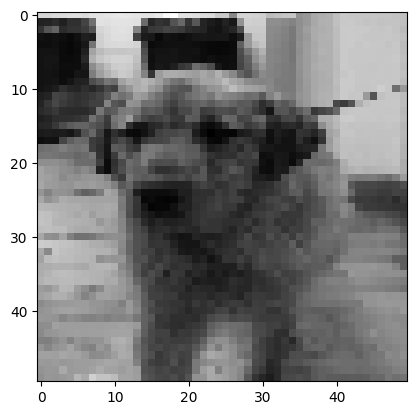

In [11]:
prediction = model.predict(xtest)
accuracy = model.score(xtest,ytest)

categories = ['Cat', 'Dog']

#show the accuracy
print('Accuracy: ', accuracy)

print('prediction is : ',categories[prediction[1]])

mypet = xtest[2].reshape(50,50)
plt.imshow(mypet, cmap='gray')
plt.show()